In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('2011-16 Stats Only Star.xlsx')
df

,Player,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,...,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference,All Star
0,Kyrie Irving,19.096,8.31,7.3,13.7,0.529,4.9,8.6,0.569,2.4,...,1.8,16.4,1.722222,75,193,3.0,76.00,75.67,1.00,1
1,Brandon Knight,19.208,8.91,6.4,15.1,0.423,3.8,8.3,0.461,2.6,...,0.6,16.8,1.342857,75,195,5.0,78.75,78.38,3.75,0
2,Kemba Walker,21.051,10.44,8.2,19.2,0.428,6.2,13.3,0.471,1.9,...,0.5,9.5,2.000000,73,184,16.0,75.50,74.50,2.50,1
3,Jimmer Fredette,22.123,5.76,10.5,23.1,0.452,6.7,13.7,0.491,3.7,...,0.1,12.7,1.200000,74,195,NaN,77.00,76.75,3.00,0
4,Nolan Smith,22.338,8.31,8.3,18.0,0.458,6.4,12.9,0.501,1.8,...,0.2,14.8,1.621622,74,190,19.0,78.00,77.88,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Jahlil Okafor,19.197,9.87,9.8,14.7,0.664,9.8,14.7,0.664,0.0,...,4.5,15.6,0.515152,83,260,2.0,90.25,89.06,7.25,0
231,Jakob Poeltl,20.257,8.79,8.3,12.9,0.646,8.3,12.9,0.646,0.0,...,5.0,13.7,0.962963,84,248,NaN,86.75,85.88,2.75,0
232,Chinanu Onuaku,19.239,7.74,7.2,11.6,0.620,7.2,11.5,0.623,0.0,...,9.6,20.8,0.794118,82,245,63.0,86.75,86.63,4.75,0
233,Diamond Stone,19.138,8.31,8.3,14.6,0.568,8.3,14.6,0.568,0.0,...,7.1,12.9,0.269231,83,255,6.0,88.00,86.89,5.00,0


In [3]:
import dabl

In [4]:
df['RSCI Rank'] = pd.to_numeric(df['RSCI Rank'], errors='coerce')
df['RSCI Rank'] = df['RSCI Rank'].fillna(df['RSCI Rank'].mean())

Target looks like classification
Showing only top 10 of 42 continuous features


/opt/anaconda3/lib/python3.7/site-packages/dabl/plot/utils.py:621: UserWarning: Dropped 1 outliers in column Age.
  int(dropped), series.name), UserWarning)


Linear Discriminant Analysis training set score: 0.699


/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


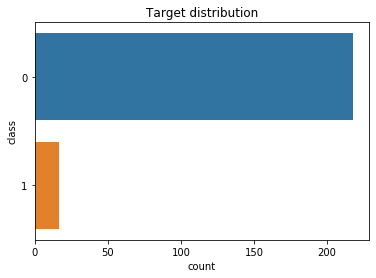

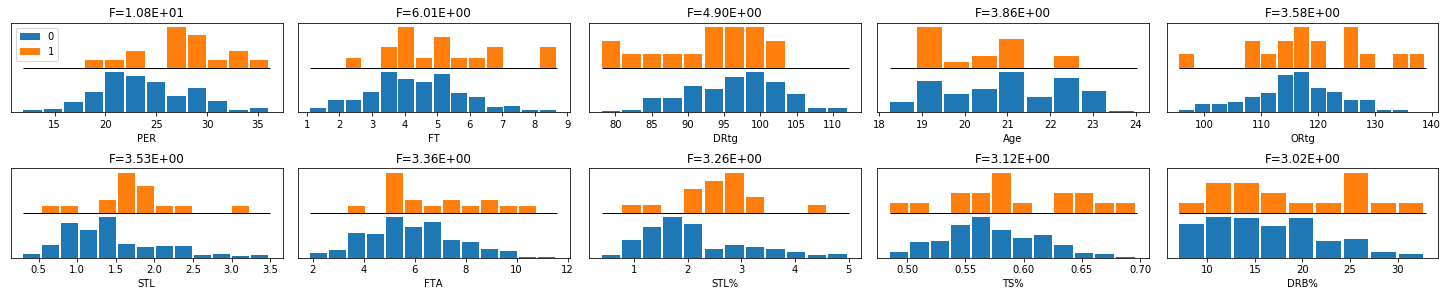

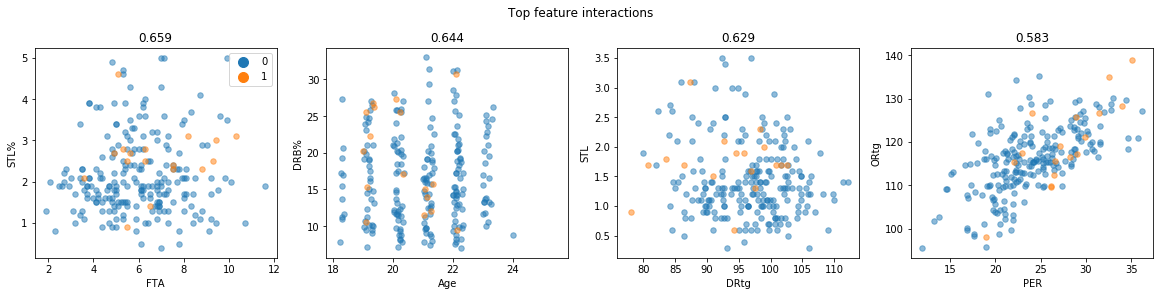

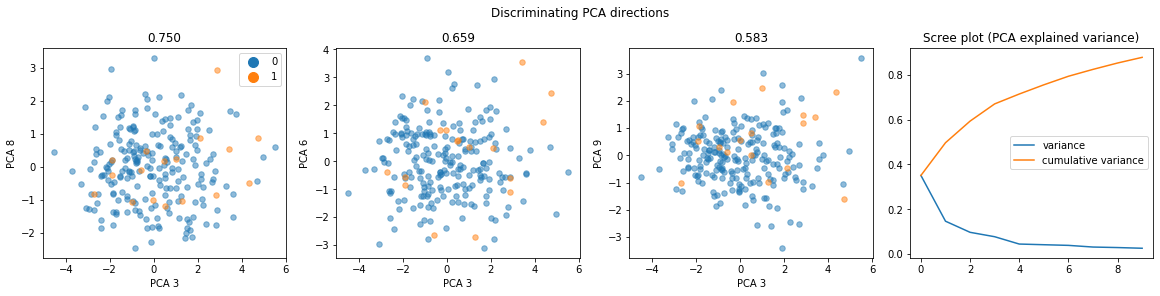

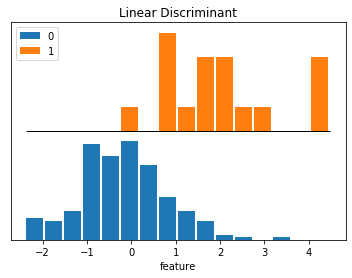

In [5]:
dabl.plot(df, target_col="All Star")

In [6]:
sc = dabl.SimpleClassifier()
sc.fit(df, target_col='All Star')

Running DummyClassifier(strategy='prior')
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.928 average_precision: 0.072 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.481

Running GaussianNB()
accuracy: 0.438 average_precision: 0.084 roc_auc: 0.539 recall_macro: 0.536 f1_macro: 0.361
=== new best GaussianNB() (using recall_macro):
accuracy: 0.438 average_precision: 0.084 roc_auc: 0.539 recall_macro: 0.536 f1_macro: 0.361

Running MultinomialNB()
accuracy: 0.928 average_precision: 0.184 roc_auc: 0.638 recall_macro: 0.500 f1_macro: 0.481
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.655 average_precision: 0.112 roc_auc: 0.645 recall_macro: 0.645 f1_macro: 0.495
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.655 average_precision: 0.112 roc_auc: 0.645 recall_macro: 0.645 f

SimpleClassifier(random_state=None, refit=True, shuffle=True, type_hints=None,
                 verbose=1)

In [7]:
X = df.drop(['Player','All Star'], axis=1)
y = df['All Star']

In [8]:
from xverse.transformer import MonotonicBinning

clf = MonotonicBinning()
clf.fit(X, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [9]:
clf.bins

{'Age': array([18.242, 20.176, 22.024, 27.148]),
 'SOS': array([-5.39,  7.17,  8.31, 12.13]),
 'FG': array([ 3.5,  6.3,  7.4, 11.2]),
 'FGA': array([ 7.6, 12.9, 15.5, 23.1]),
 'FG%': array([0.369, 0.453, 0.5  , 0.664]),
 '2P': array([ 2.2,  4.7,  6.1, 10.2]),
 '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
 '2P%': array([0.376, 0.497, 0.541, 0.664]),
 '3P': array([0. , 0.8, 2. , 4.6]),
 '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
 '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
 'FT': array([1.1, 3.8, 5. , 8.7]),
 'FTA': array([ 1.9,  5.1,  6.8, 11.6]),
 'FT%': array([0.295, 0.706, 0.783, 0.925]),
 'TRB': array([ 2.8,  6.1,  9.6, 16.7]),
 'AST': array([ 0.2,  1.9,  3.4, 11.8]),
 'STL': array([0.3, 1.1, 1.6, 3.5]),
 'BLK': array([0. , 0.5, 1.2, 5.8]),
 'TOV': array([1. , 2.3, 3. , 5. ]),
 'PF': array([1.4, 2.5, 3.2, 7.6]),
 'PTS': array([ 9.9, 17.8, 21.1, 32.3]),
 'ORtg': array([ 95.5, 113.4, 119.2, 139. ]),
 'DRtg': array([ 78.1,  93.1,  99.6, 112.2]),
 'PER': array([11.9, 21.9, 25.9, 36.2]),
 'TS%':

In [10]:
output_bins = clf.bins #will be used later in this exercise

In [11]:
out_X = clf.transform(X)

In [12]:
out_X.head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,"(18.241, 20.176]","(7.17, 8.31]","(6.3, 7.4]","(12.9, 15.5]","(0.5, 0.664]","(4.7, 6.1]","(3.999, 9.1]","(0.541, 0.664]","(2.0, 4.6]","(2.2, 5.4]",...,"(2.3, 5.0]","(1.4, 3.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
1,"(18.241, 20.176]","(8.31, 12.13]","(6.3, 7.4]","(12.9, 15.5]","(0.368, 0.453]","(2.1990000000000003, 4.7]","(3.999, 9.1]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(0.399, 1.7]","(0.099, 1.4]","(14.7, 27.8]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"
2,"(20.176, 22.024]","(8.31, 12.13]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(0.8, 2.0]","(5.4, 11.2]",...,"(2.3, 5.0]","(0.099, 1.4]","(5.699, 12.0]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
3,"(22.024, 27.148]","(-5.391, 7.17]","(7.4, 11.2]","(15.5, 23.1]","(0.368, 0.453]","(6.1, 10.2]","(11.5, 17.3]","(0.375, 0.497]","(2.0, 4.6]","(5.4, 11.2]",...,"(1.7, 2.3]","(0.099, 1.4]","(12.0, 14.7]","(0.794, 1.375]","(68.999, 78.0]","(159.999, 205.0]","(24.0, 45.597]","(70.999, 81.25]","(70.87899999999999, 80.58]","(-2.251, 3.0]"
4,"(22.024, 27.148]","(7.17, 8.31]","(7.4, 11.2]","(15.5, 23.1]","(0.453, 0.5]","(6.1, 10.2]","(11.5, 17.3]","(0.497, 0.541]","(0.8, 2.0]","(2.2, 5.4]",...,"(1.7, 2.3]","(0.099, 1.4]","(14.7, 27.8]","(1.375, 3.619]","(68.999, 78.0]","(159.999, 205.0]","(0.999, 24.0]","(70.999, 81.25]","(70.87899999999999, 80.58]","(3.0, 4.5]"


In [13]:
from xverse.transformer import WOE

clf = WOE()
clf.fit(X, y)

WOE(exclude_features=None, feature_names='all', mono_cardinality_cutoff=5,
    mono_custom_binning={'2P': array([ 2.2,  4.7,  6.1, 10.2]),
                         '2P%': array([0.376, 0.497, 0.541, 0.664]),
                         '2PA': array([ 4. ,  9.1, 11.5, 17.3]),
                         '3P': array([0. , 0.8, 2. , 4.6]),
                         '3P%': array([0.   , 0.304, 0.377, 0.6  ]),
                         '3PA': array([ 0. ,  2.2,  5.4, 11.2]),
                         '3PAr': array([0.   , 0.178, 0.362, 0.666]),
                         'AST': array([ 0.2,  1.9,  3.4,...
              'PER': {Interval(11.899000000000001, 21.9, closed='right'): -1.843167435939566,
                      Interval(21.9, 25.9, closed='right'): -0.6267721116150727,
                      Interval(25.9, 36.2, closed='right'): 0.9418438062987725},
              'PF': {Interval(1.399, 2.5, closed='right'): 0.05258174681253679,
                     Interval(2.5, 3.2, closed='right'): -0.0636780

In [14]:
clf.woe_df.head(10)

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,2P,"(2.1990000000000003, 4.7]",79,3,76,0.037975,0.962025,0.176471,0.348624,-0.680839,0.157581
1,2P,"(4.7, 6.1]",78,7,71,0.089744,0.910256,0.411765,0.325688,0.234512,0.157581
2,2P,"(6.1, 10.2]",78,7,71,0.089744,0.910256,0.411765,0.325688,0.234512,0.157581
3,2P%,"(0.375, 0.497]",80,6,74,0.075000,0.925000,0.352941,0.339450,0.038976,0.055848
4,2P%,"(0.497, 0.541]",77,4,73,0.051948,0.948052,0.235294,0.334862,-0.352883,0.055848
5,2P%,"(0.541, 0.664]",78,7,71,0.089744,0.910256,0.411765,0.325688,0.234512,0.055848
6,2PA,"(3.999, 9.1]",81,3,78,0.037037,0.962963,0.176471,0.357798,-0.706815,0.188314
7,2PA,"(9.1, 11.5]",78,8,70,0.102564,0.897436,0.470588,0.321101,0.382228,0.188314
8,2PA,"(11.5, 17.3]",76,6,70,0.078947,0.921053,0.352941,0.321101,0.094546,0.188314
9,3P,"(-0.001, 0.8]",82,5,77,0.060976,0.939024,0.294118,0.353211,-0.183086,0.033374


In [15]:
clf.iv_df

,Variable_Name,Information_Value
28,PER,1.112234
33,STL,0.837413
34,STL%,0.750751
9,AST:TOV,0.687161
8,AST%,0.669478
21,FT%,0.431568
17,FG,0.423908
30,PTS,0.411805
7,AST,0.360765
18,FG%,0.324427


In [16]:
output_woe_bins = clf.woe_bins #future transformation

In [17]:
output_woe_bins

{'2P': {Interval(2.1990000000000003, 4.7, closed='right'): -0.6808393328853486,
  Interval(4.7, 6.1, closed='right'): 0.23451199074687074,
  Interval(6.1, 10.2, closed='right'): 0.23451199074687074},
 '2P%': {Interval(0.375, 0.497, closed='right'): 0.03897609475675815,
  Interval(0.497, 0.541, closed='right'): -0.35288336129562753,
  Interval(0.541, 0.664, closed='right'): 0.23451199074687074},
 '2PA': {Interval(3.999, 9.1, closed='right'): -0.7068148192886091,
  Interval(9.1, 11.5, closed='right'): 0.3822280183633498,
  Interval(11.5, 17.3, closed='right'): 0.09454594591156902},
 '3P': {Interval(-0.001, 0.8, closed='right'): -0.18308579068671052,
  Interval(0.8, 2.0, closed='right'): 0.23451199074687074,
  Interval(2.0, 4.6, closed='right'): -0.08777561088238572},
 '3P%': {Interval(-0.001, 0.304, closed='right'): 0.05258174681253679,
  Interval(0.304, 0.377, closed='right'): -0.14334546203719653,
  Interval(0.377, 0.6, closed='right'): 0.08036131091961252},
 '3PA': {Interval(-0.001, 2

In [18]:
clf.transform(X).head()

,Age,SOS,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,STL%,BLK%,TOV%,AST:TOV,Hght\n(inches),Weight,RSCI Rank,Max Measured Wingspan (inches),Avg Measured Wingspan (inches,Difference
0,0.368043,0.052582,0.605372,-0.101960,0.234512,0.234512,-0.706815,0.234512,-0.087776,-0.000764,...,0.861801,0.206732,0.382228,0.234512,-0.097928,-0.156768,0.340264,0.286918,0.220526,0.090473
1,0.368043,0.094546,0.605372,-0.101960,0.368043,-0.680839,-0.706815,0.038976,-0.087776,0.138349,...,-1.186388,0.038976,0.382228,0.528999,-0.097928,-0.156768,0.340264,0.286918,0.220526,-0.960264
2,0.234512,0.094546,-0.101960,0.066375,0.368043,0.234512,0.094546,0.038976,0.234512,0.138349,...,0.861801,0.038976,-0.143345,0.234512,-0.097928,-0.156768,0.340264,0.286918,0.220526,0.090473
3,-1.086304,-0.156768,-0.101960,0.066375,0.368043,0.234512,0.094546,0.038976,-0.087776,0.138349,...,-0.584212,0.038976,-0.366489,0.528999,-0.097928,-0.156768,-0.827443,0.286918,0.220526,0.090473
4,-1.086304,0.052582,-0.101960,0.066375,-1.086304,0.234512,0.094546,-0.352883,0.234512,-0.000764,...,-0.584212,0.038976,0.382228,0.234512,-0.097928,-0.156768,0.340264,0.286918,0.220526,-0.960264


In [19]:
from xverse.graph import BarCharts

In [20]:
woe_df = clf.woe_df

In [21]:
clf = BarCharts(bar_type='v')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/opt/anaconda3/lib/python3.7/site-packages/xverse/graph/_bivariate_charts.py:152: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


BarCharts(bar_color='#058caa', bar_type='v', exclude_features=None,
          feature_names='all', fig_size=(8, 6), num_color='#ed8549',
          plot_metric='mean')

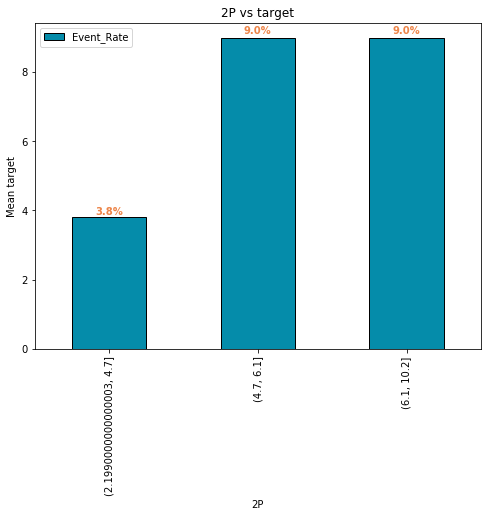

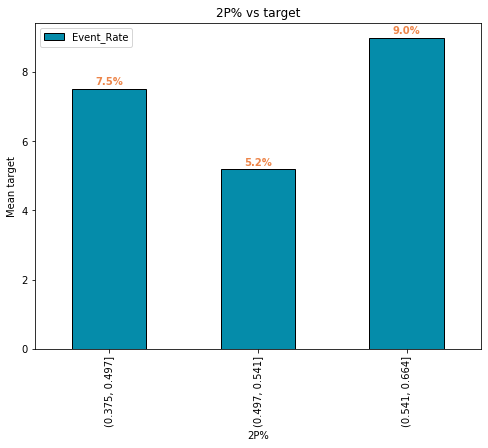

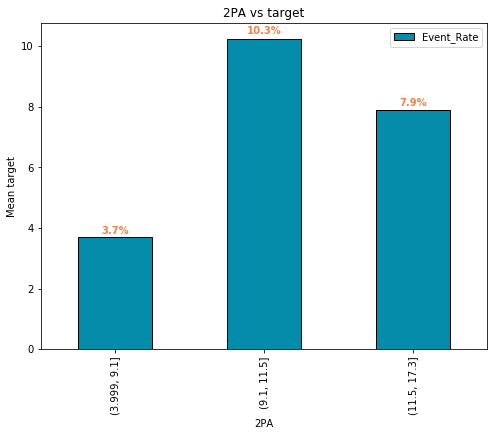

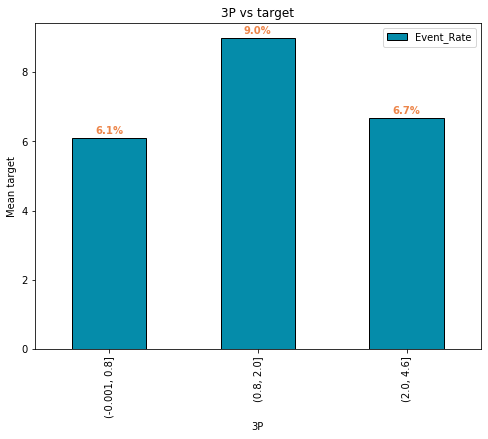

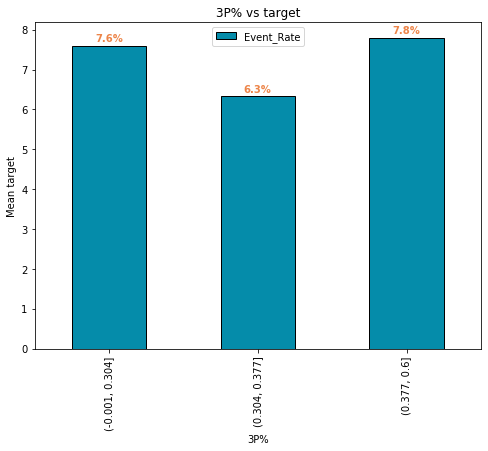

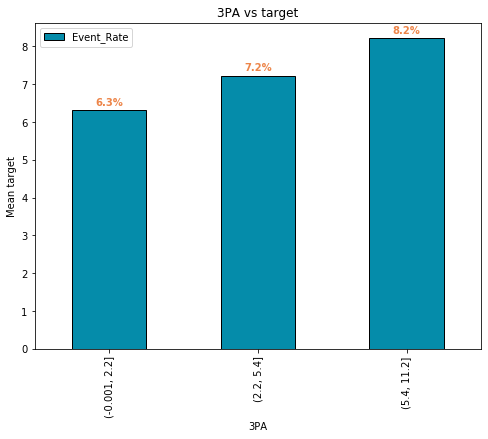

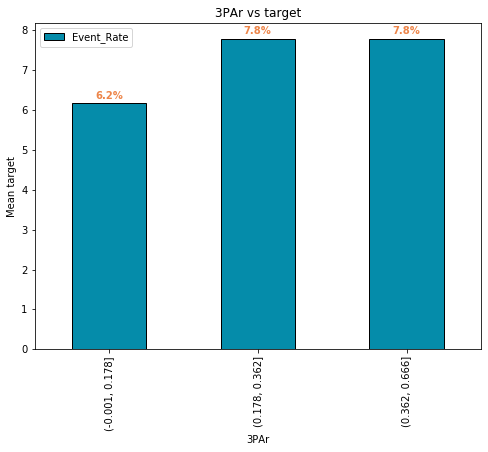

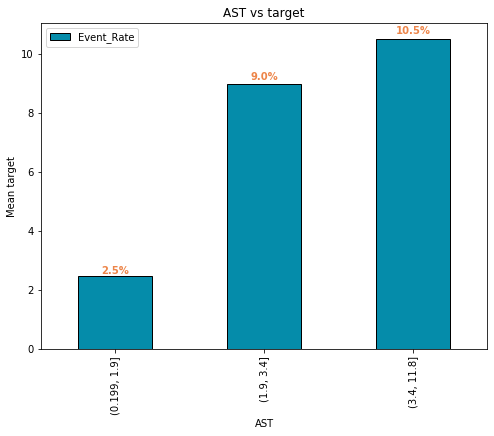

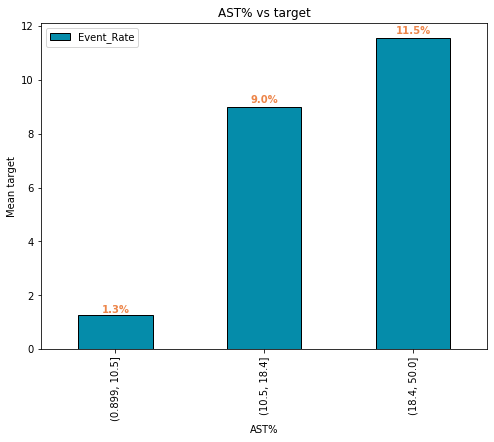

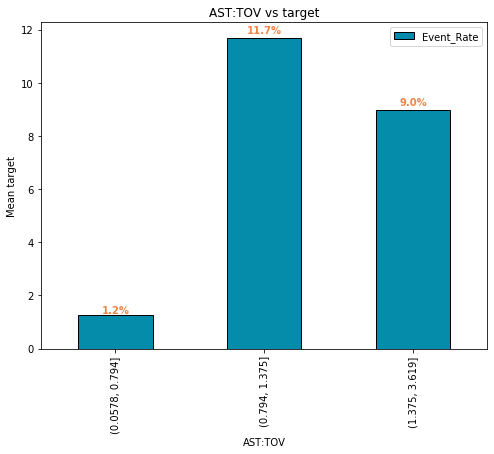

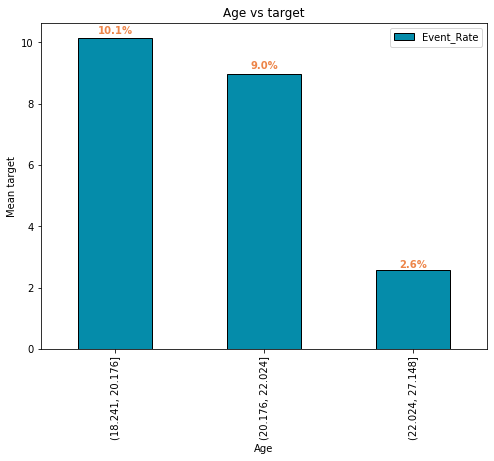

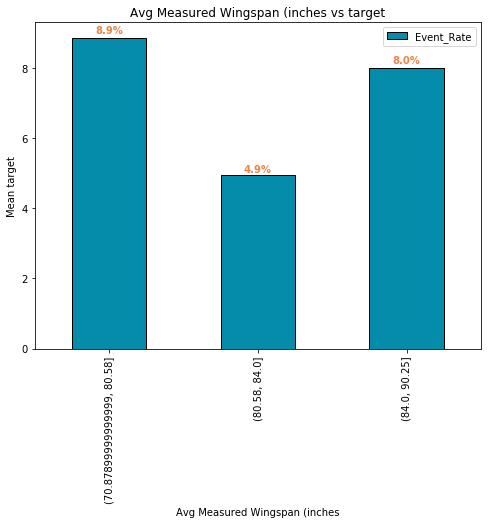

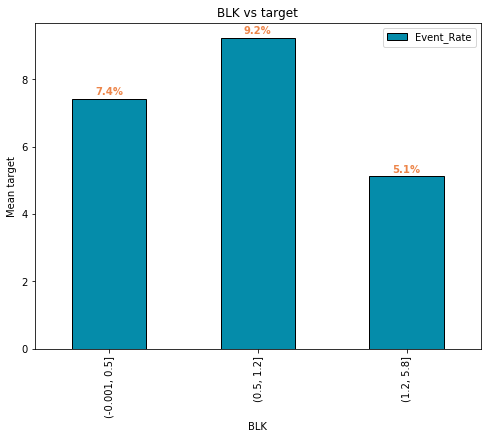

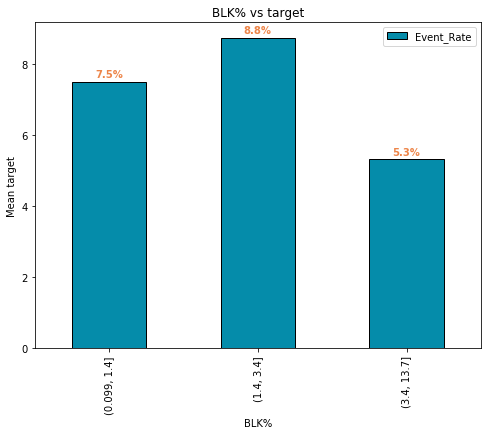

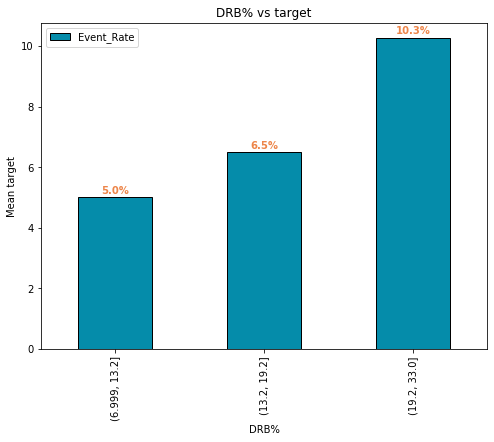

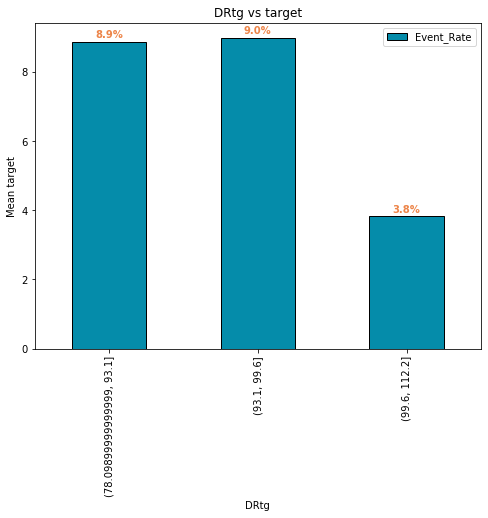

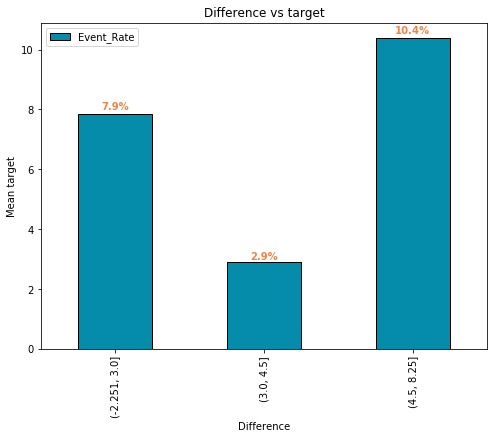

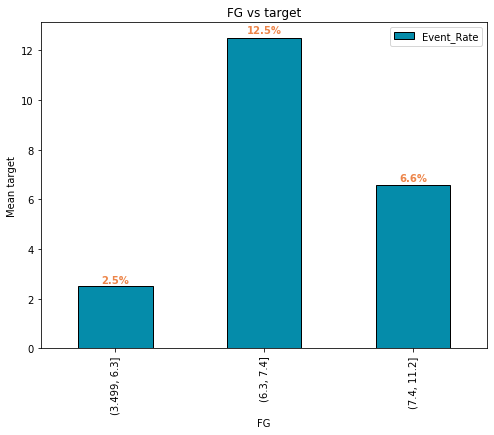

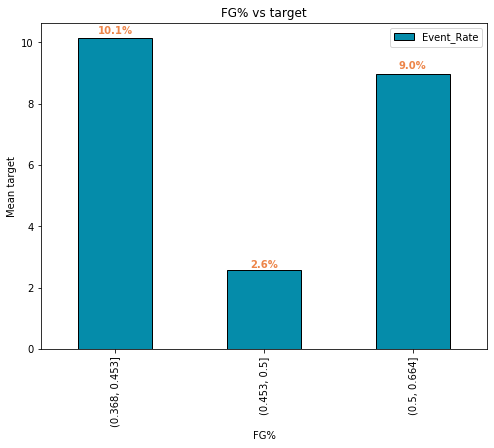

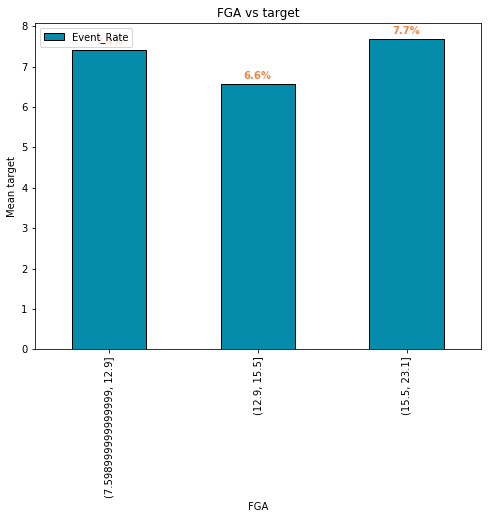

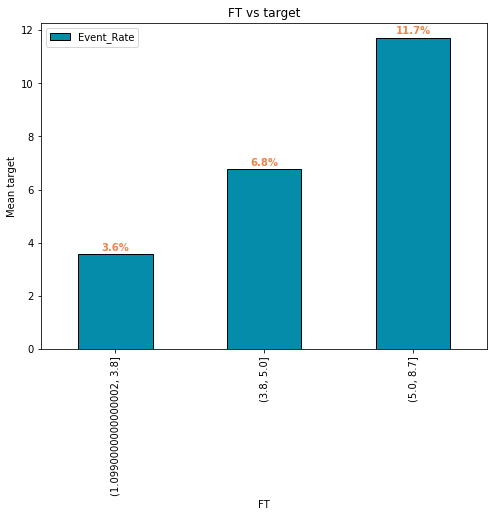

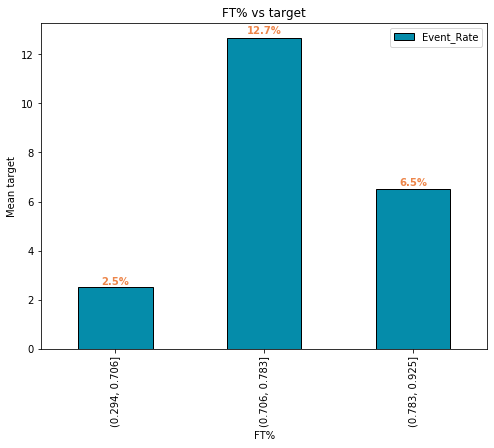

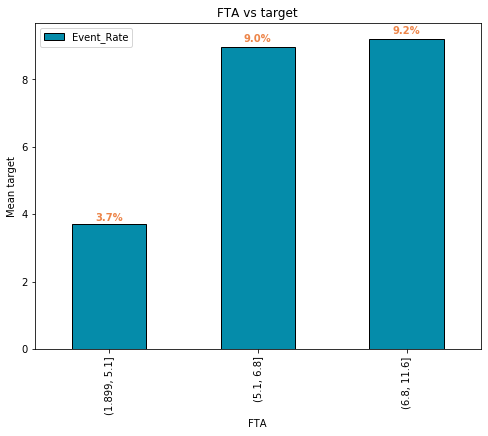

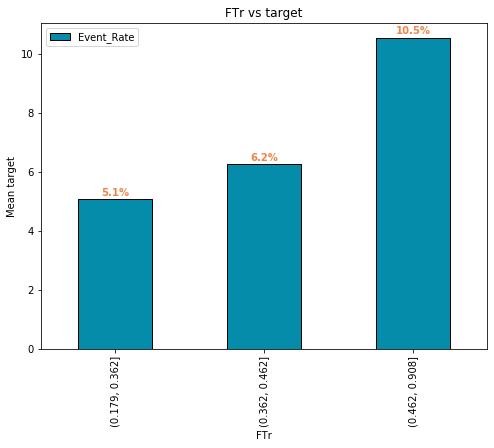

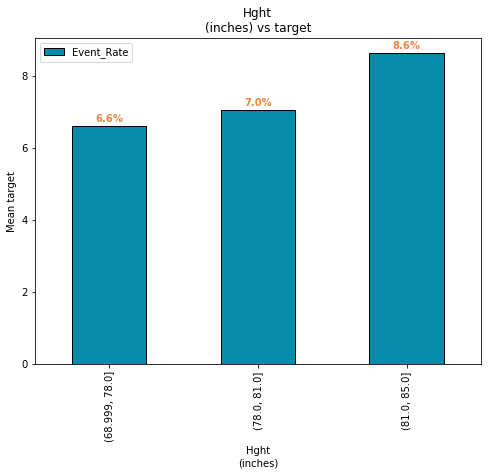

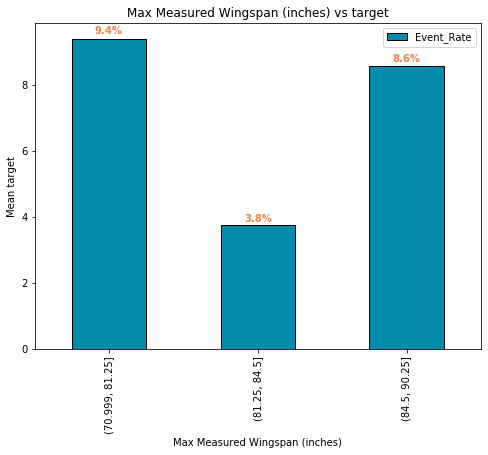

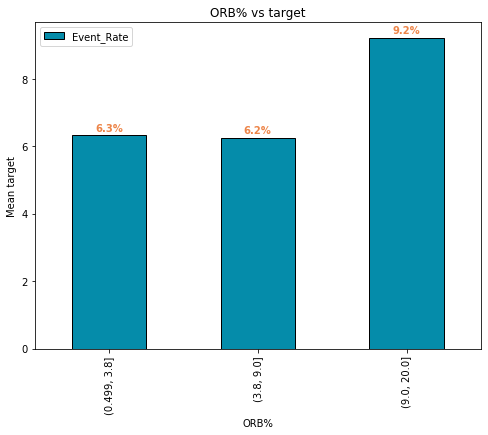

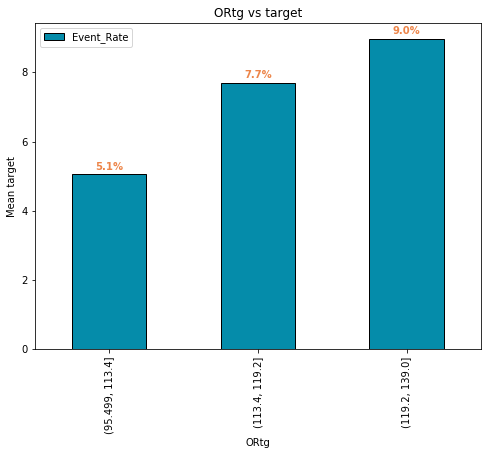

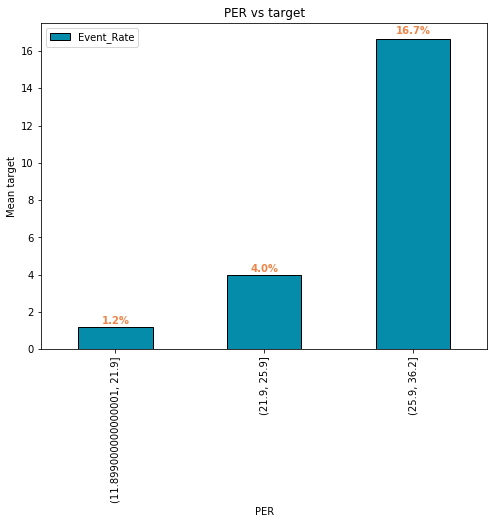

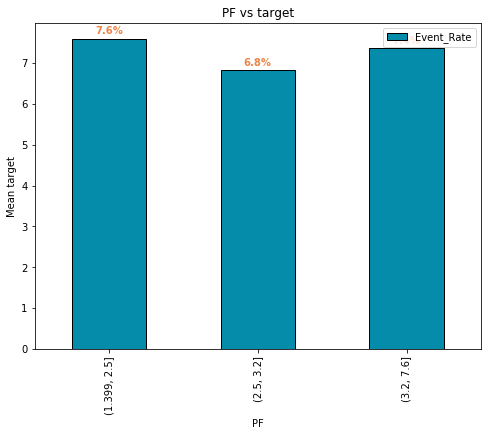

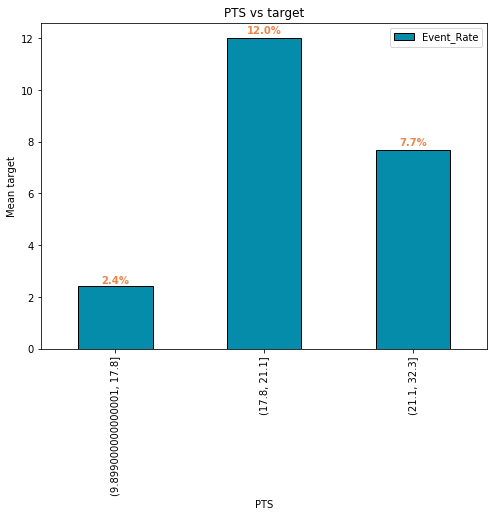

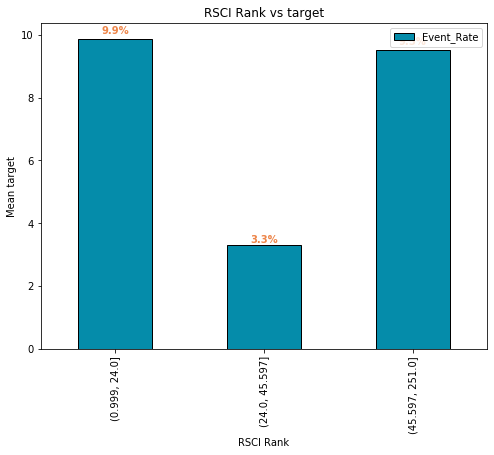

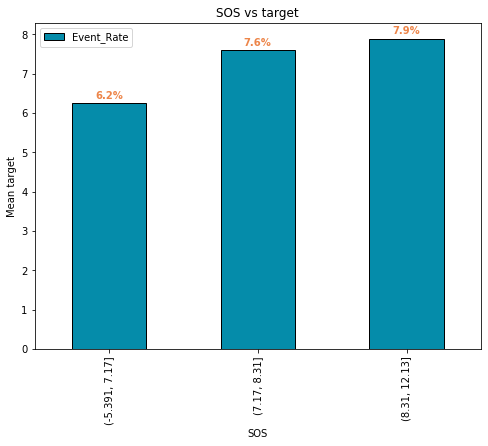

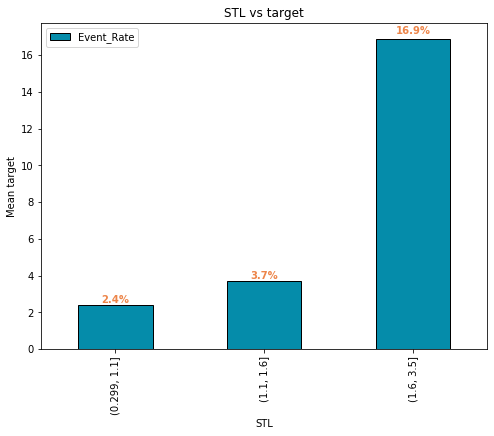

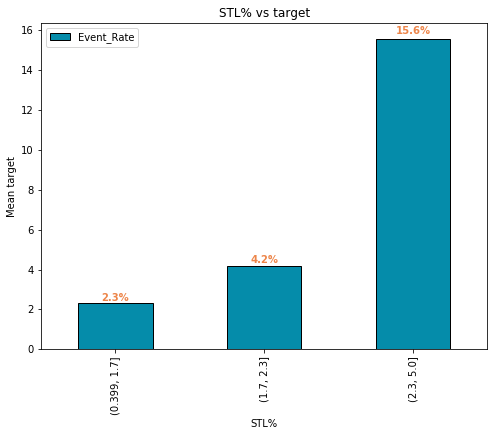

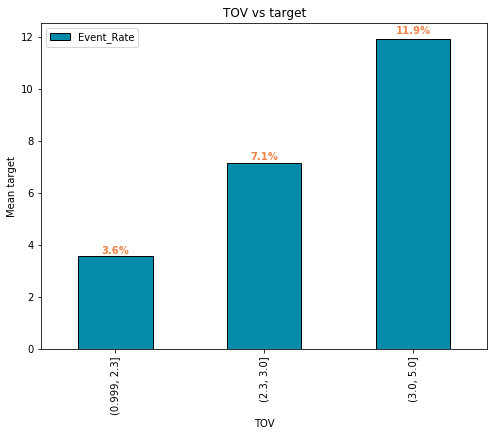

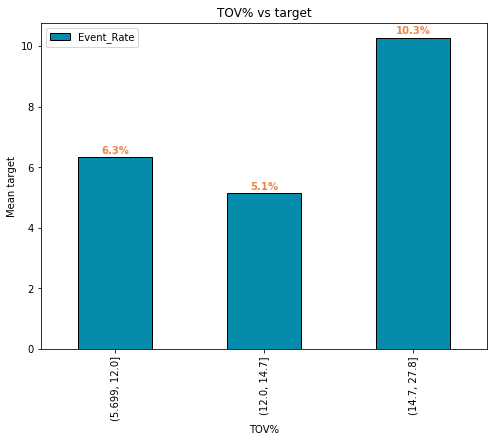

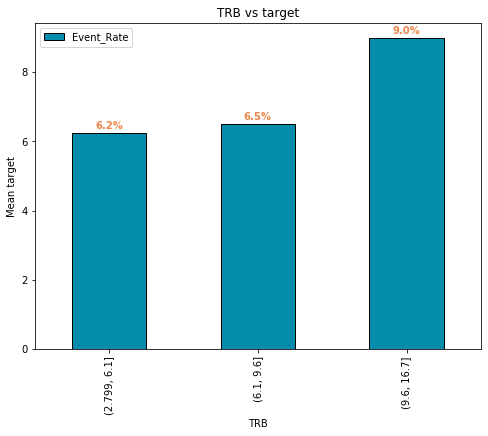

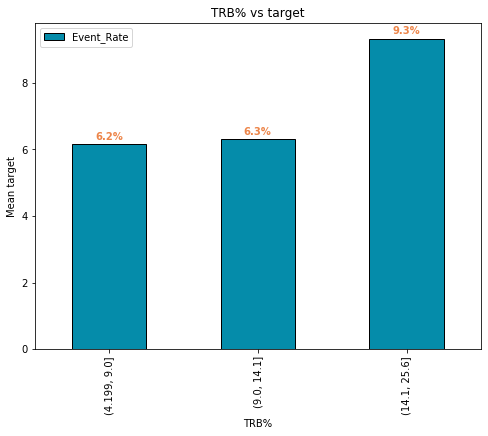

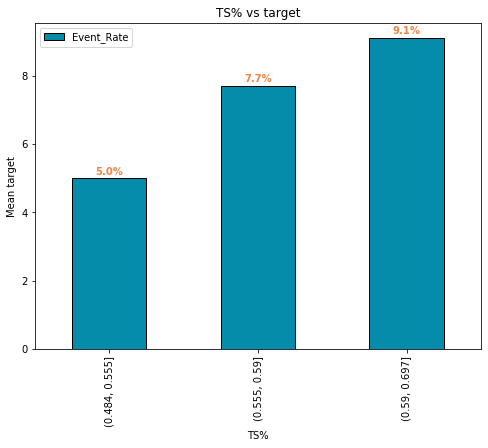

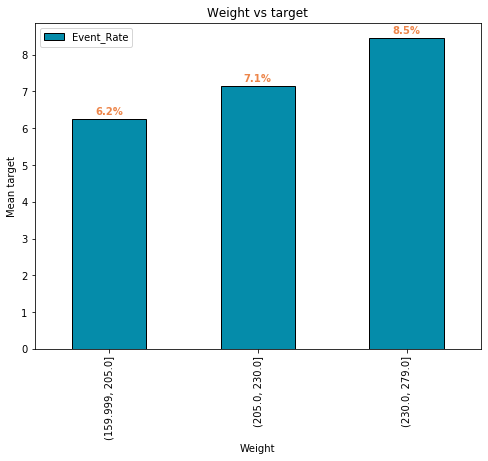

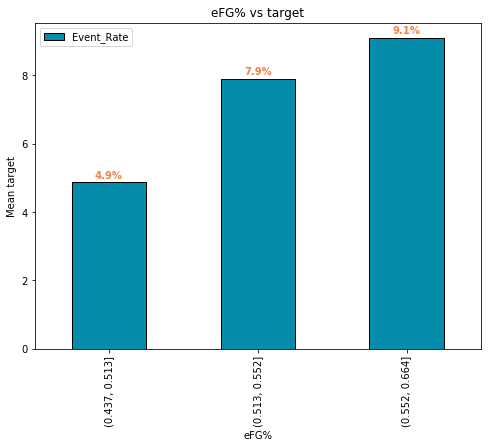

In [22]:
clf.plot(woe_df)

In [23]:
from xverse.ensemble import VotingSelector

clf = VotingSelector()
clf.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=21,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [24]:
clf.available_techniques

['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE']

In [25]:
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,PER,1.112234,0.011567,0.518390,0.029788,0.748424,0.010139
1,STL,0.837413,0.036812,0.000000,0.033048,0.378044,0.000000
2,STL%,0.750751,0.011833,-0.092467,0.021189,0.348089,0.000000
3,AST:TOV,0.687161,0.010181,0.000000,0.031930,0.049726,0.000000
4,AST%,0.669478,0.018312,0.000000,0.033693,0.329950,0.000000
5,FT%,0.431568,0.040189,0.142114,0.026270,0.072870,0.000000
6,FG,0.423908,0.000318,-0.403231,0.034379,0.034564,0.000000
7,PTS,0.411805,0.017197,-0.513608,0.012094,0.147359,0.000000
8,AST,0.360765,0.014128,0.000000,0.022701,0.271181,0.000000
9,FG%,0.324427,0.024774,0.000000,0.022564,0.068803,0.000000


In [26]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
10,Age,1,1,1,1,1,1,6
13,TOV,1,1,1,1,1,1,6
0,PER,1,0,1,1,1,1,5
1,STL,1,1,0,1,1,1,5
19,DRtg,1,1,0,1,1,1,5
5,FT%,1,1,1,1,0,1,5
16,FTA,1,1,0,1,1,1,5
11,FT,1,1,1,0,1,1,5
35,Hght\n(inches),0,1,1,1,0,1,4
21,DRB%,0,1,1,1,1,0,4


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [29]:
list(df.columns) 

['Player',
 'Age',
 'SOS',
 'FG',
 'FGA',
 'FG%',
 '2P',
 '2PA',
 '2P%',
 '3P',
 '3PA',
 '3P%',
 'FT',
 'FTA',
 'FT%',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'ORtg',
 'DRtg',
 'PER',
 'TS%',
 'eFG%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'AST:TOV',
 'Hght\n(inches)',
 'Weight',
 'RSCI Rank',
 'Max Measured Wingspan (inches)',
 'Avg Measured Wingspan (inches',
 'Difference',
 'All Star']

In [30]:
features = ['Age','SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3PA','3P%','FT','FTA','FT%','TRB','AST',
'STL','BLK','TOV','PF','PTS','ORtg','DRtg','PER','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%','STL%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 'Max Measured Wingspan (inches)',
'Avg Measured Wingspan (inches', 'Difference']

In [31]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


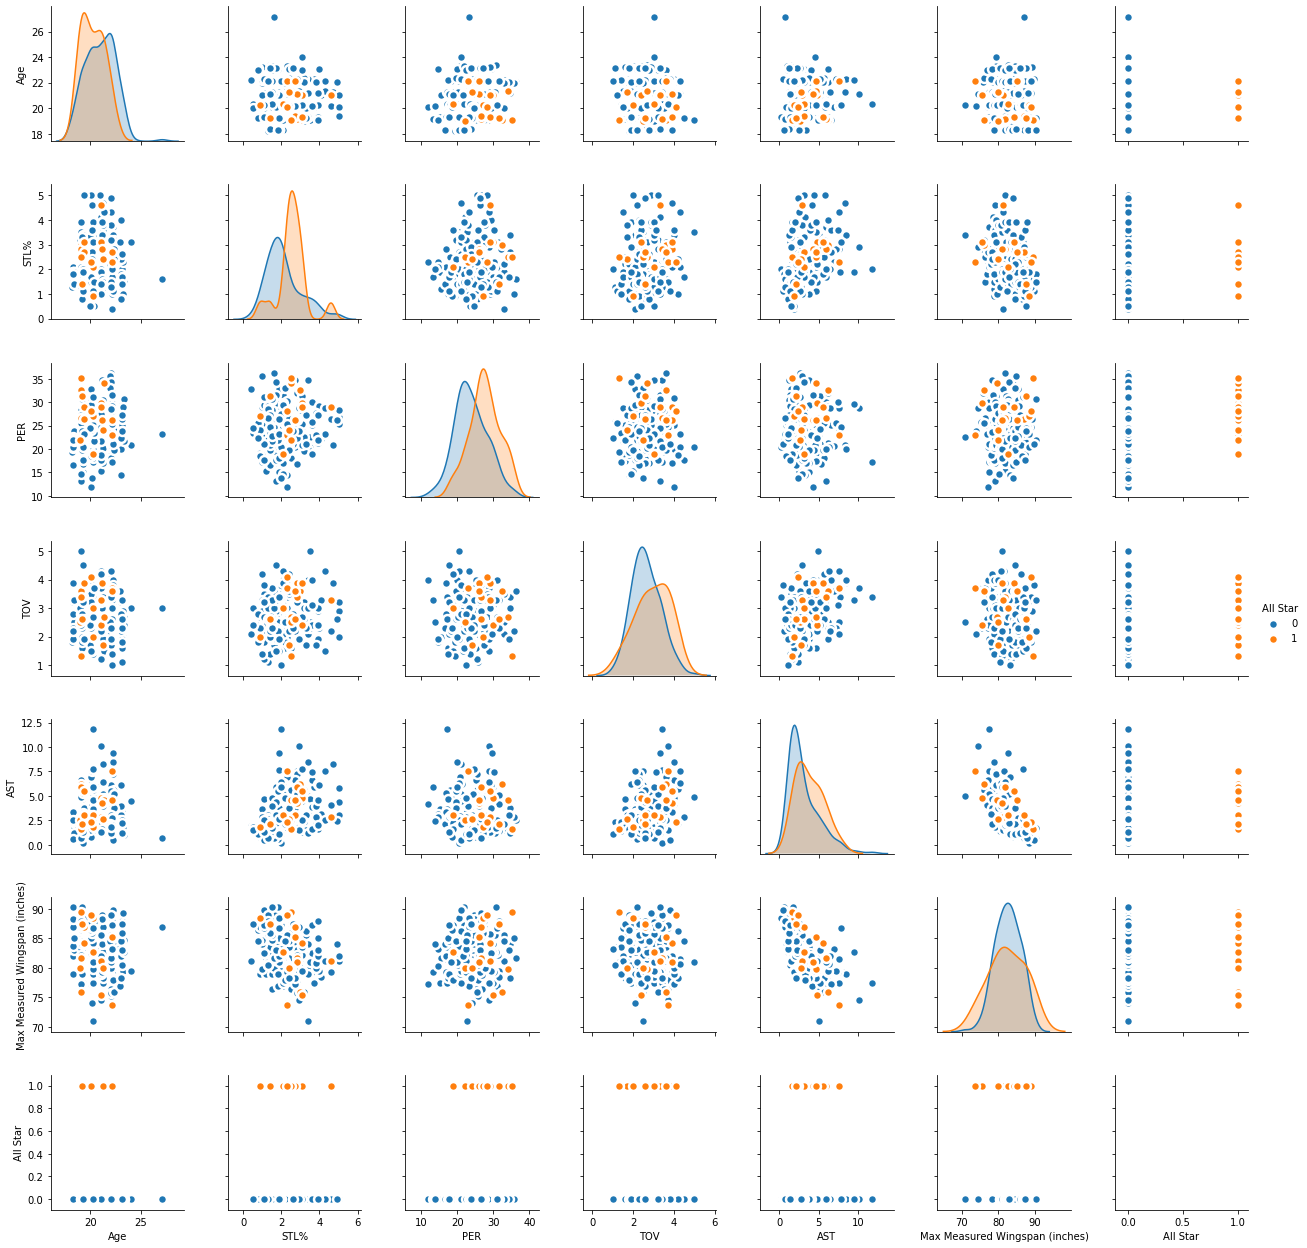

In [32]:
sns.pairplot(df[['Age','STL%', 'PER','TOV', 'AST', 'Max Measured Wingspan (inches)', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

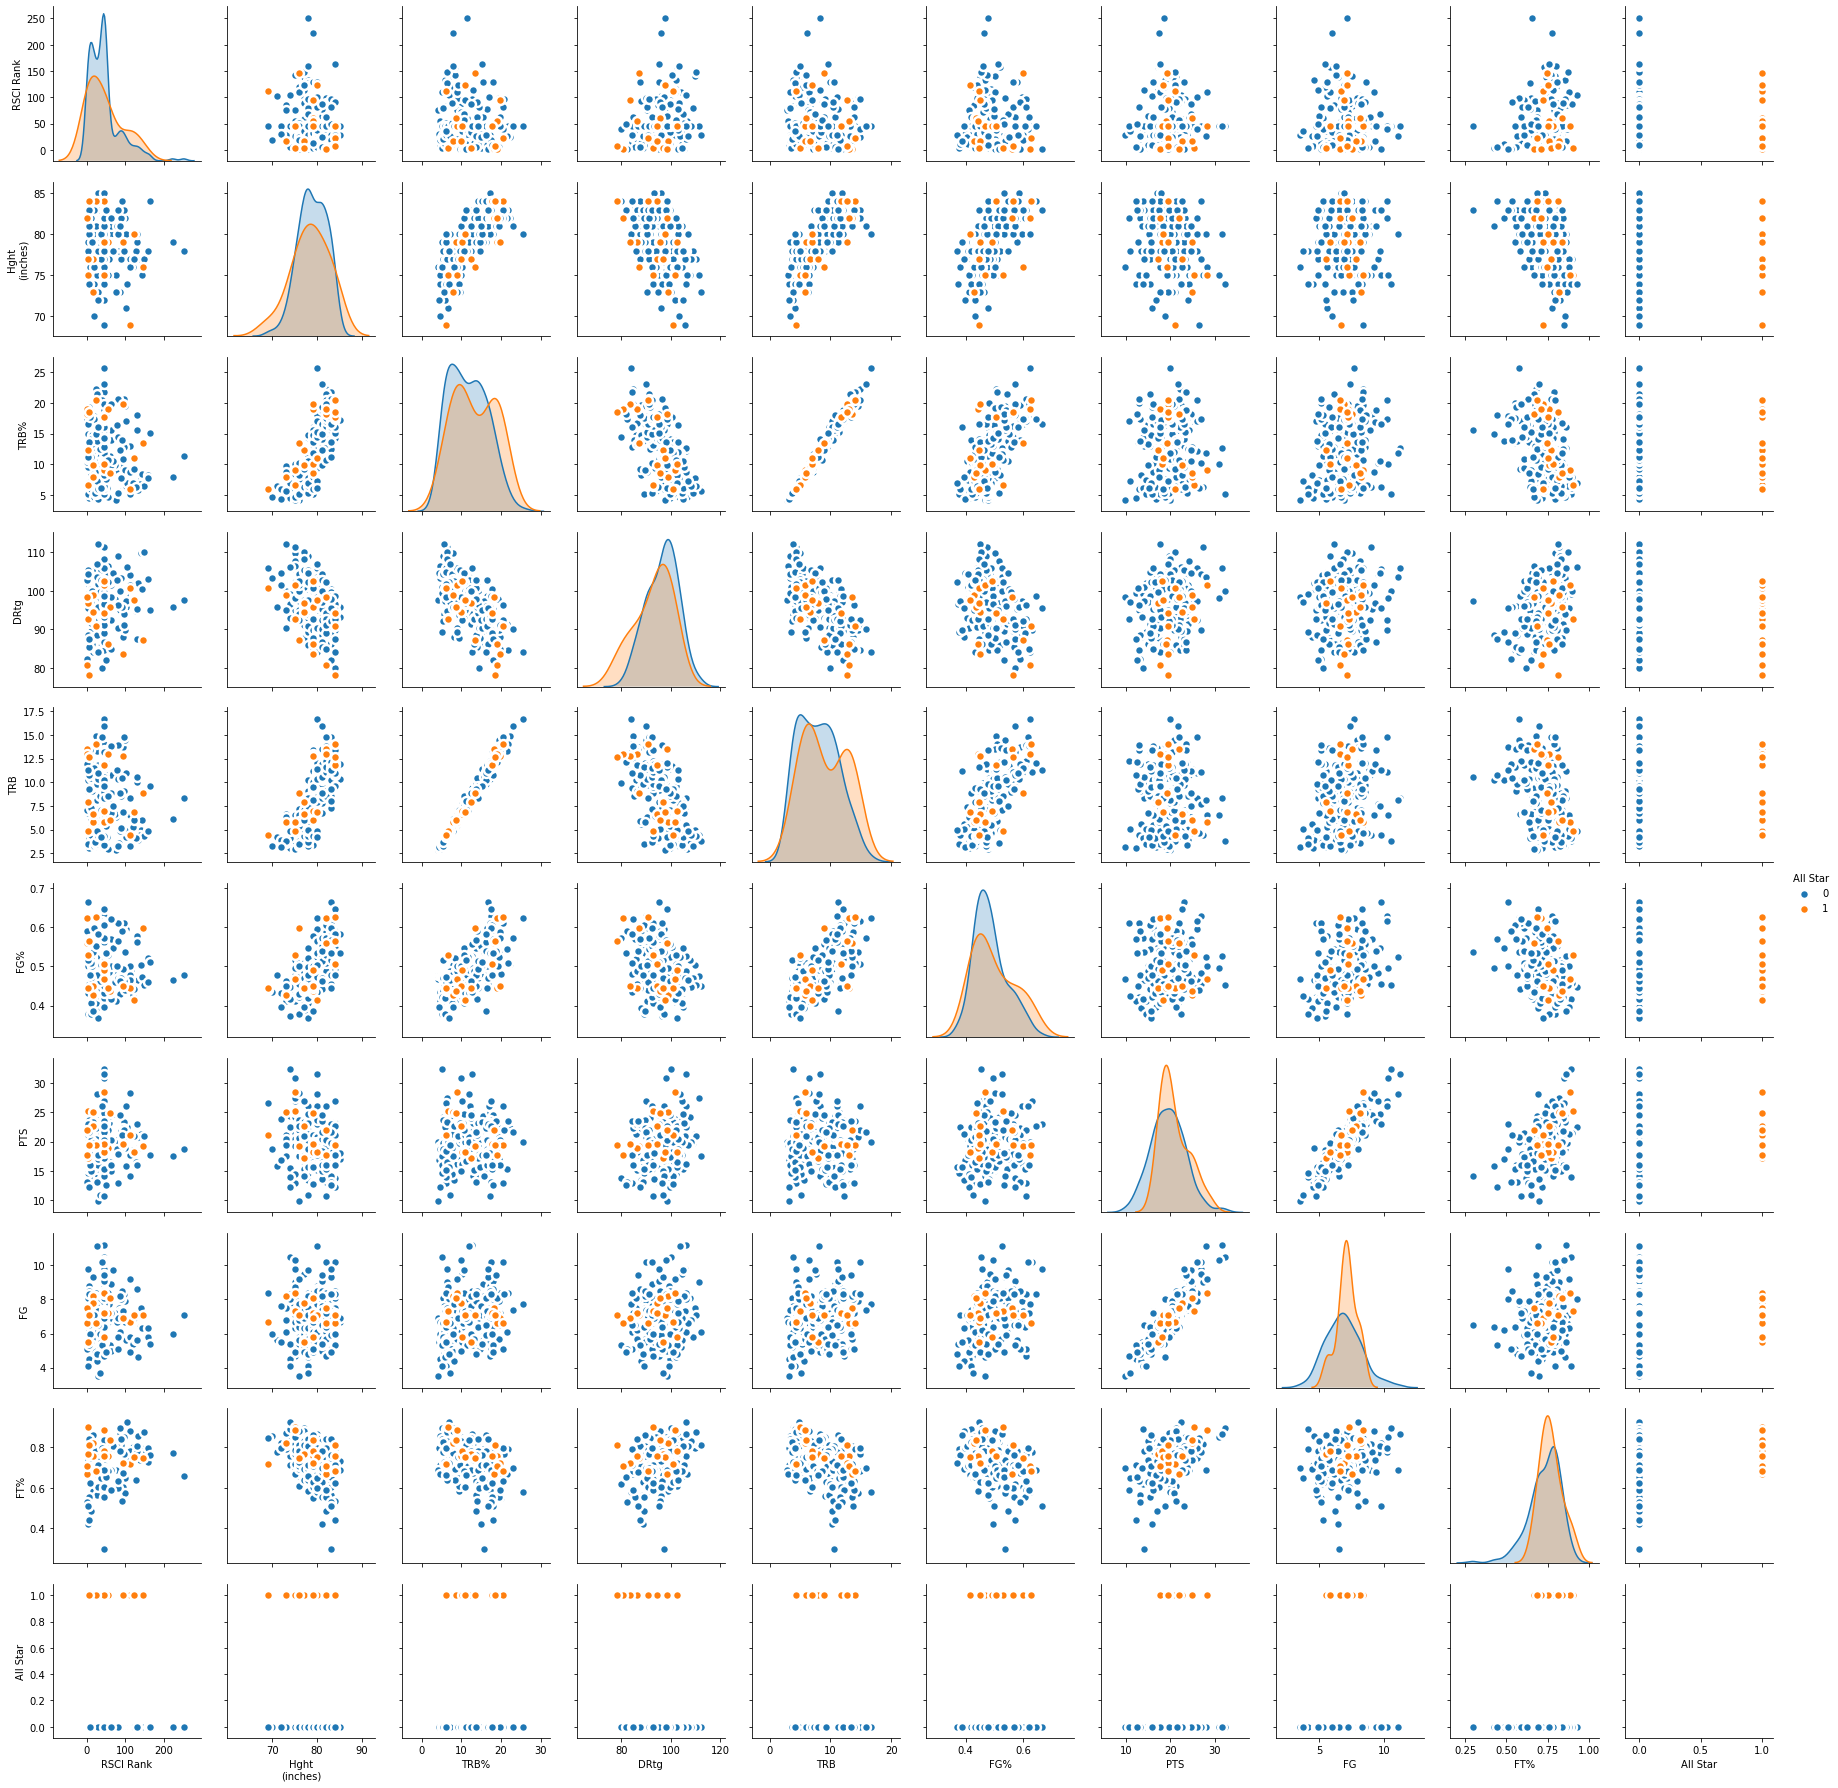

In [33]:
sns.pairplot(df[['RSCI Rank','Hght\n(inches)', 'TRB%','DRtg', 'TRB', 'FG%', 'PTS','FG','FT%', 'All Star']], hue='All Star',kind="scatter",plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [34]:
X = df.drop(['Player','All Star'], axis=1)
y = df['All Star']

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


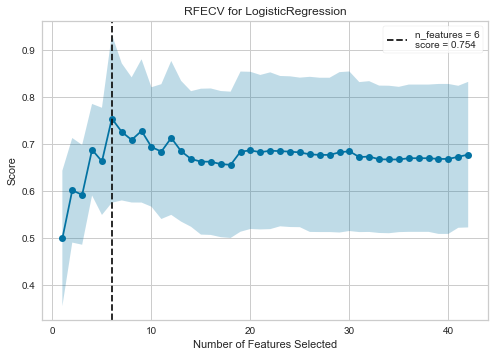

In [35]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV

cv = StratifiedKFold(5)
visualizer = RFECV(LogisticRegression(solver='liblinear', random_state=2), cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Final

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


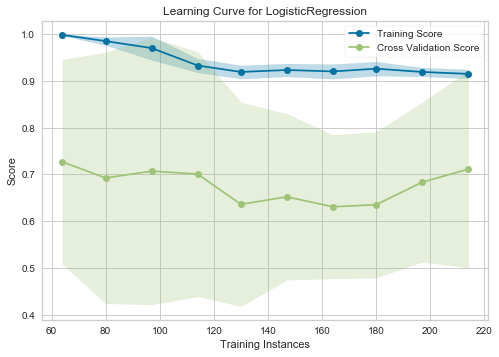

In [36]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


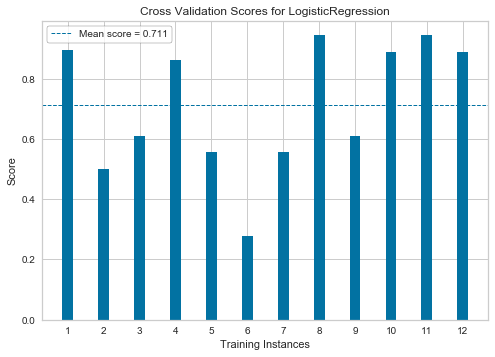

In [37]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [38]:
X = df.drop(['Player','SOS','FG','FGA','FG%', '2P','2PA','2P%','3P','3PA','3P%','FTA','FT%','TRB',
'STL','BLK','PF','PTS','ORtg','DRtg','TS%','eFG%','3PAr','FTr', 'ORB%','DRB%','TRB%','AST%',
 'BLK%','TOV%','AST:TOV','Hght\n(inches)','Weight','RSCI Rank', 
'Avg Measured Wingspan (inches', 'Difference', 'All Star'], axis=1)
y = df['All Star']

In [39]:
X

,Age,FT,AST,TOV,PER,STL%,Max Measured Wingspan (inches)
0,19.096,8.4,6.2,3.6,32.5,3.0,76.00
1,19.208,4.0,4.7,3.5,19.3,1.1,78.75
2,21.051,6.7,4.8,2.4,29.9,3.1,75.50
3,22.123,7.6,4.8,4.0,30.9,2.1,77.00
4,22.338,5.9,6.0,3.7,25.7,2.0,78.00
...,...,...,...,...,...,...,...
230,19.197,3.5,1.7,3.3,30.7,1.5,90.25
231,20.257,6.0,2.6,2.7,31.1,1.1,86.75
232,19.239,1.7,2.7,3.4,26.4,1.9,86.75
233,19.138,5.1,0.7,2.6,26.6,1.3,88.00


/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


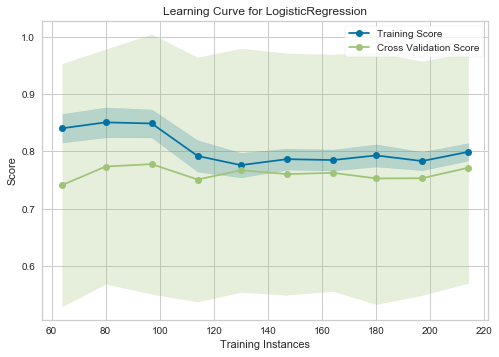

In [40]:
import numpy as np

from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve

# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=12)
sizes = np.linspace(0.3, 1.0, 10)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = LearningCurve(
    model, cv=cv, scoring='roc_auc', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:246: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


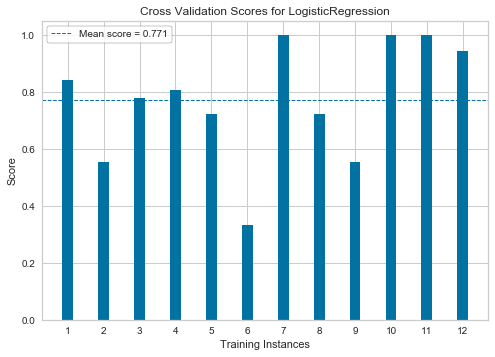

In [41]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=12, random_state=42)

# Instantiate the classification model and visualizer
model = LogisticRegression(solver='liblinear', random_state=2)
visualizer = CVScores(model, cv=cv, scoring='roc_auc')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [42]:
X

,Age,FT,AST,TOV,PER,STL%,Max Measured Wingspan (inches)
0,19.096,8.4,6.2,3.6,32.5,3.0,76.00
1,19.208,4.0,4.7,3.5,19.3,1.1,78.75
2,21.051,6.7,4.8,2.4,29.9,3.1,75.50
3,22.123,7.6,4.8,4.0,30.9,2.1,77.00
4,22.338,5.9,6.0,3.7,25.7,2.0,78.00
...,...,...,...,...,...,...,...
230,19.197,3.5,1.7,3.3,30.7,1.5,90.25
231,20.257,6.0,2.6,2.7,31.1,1.1,86.75
232,19.239,1.7,2.7,3.4,26.4,1.9,86.75
233,19.138,5.1,0.7,2.6,26.6,1.3,88.00


In [43]:
features = ['Age', 'FT', 'AST', 'TOV', 'PER','STL%', 'Max Measured Wingspan(inches)']

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Train accuracy: 0.9261363636363636
Test accuracy: 0.9491525423728814
ROC AUC: 0.8988095238095237


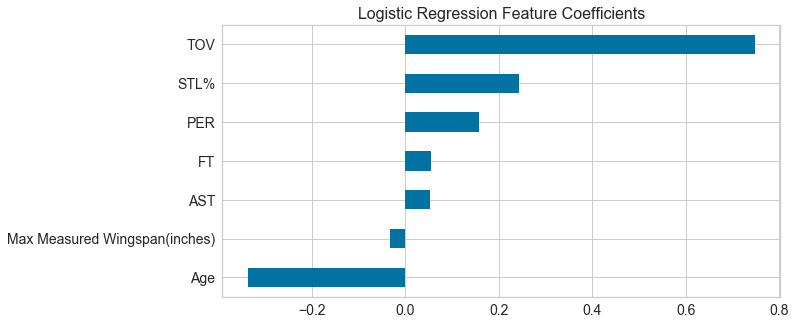

In [45]:
logreg = LogisticRegression(solver='liblinear', random_state=2).fit(x_train, y_train)
y_scores_logreg = logreg.predict_proba(x_test)[:,1]
y_pred_logreg = logreg.predict(x_test)

print("Train accuracy:",logreg.score(x_train, y_train))
print("Test accuracy:", logreg.score(x_test, y_test))
print("ROC AUC:", roc_auc_score(y_test, y_scores_logreg))

ax = pd.DataFrame(
    logreg.coef_.transpose(),
    index=features,
    columns=['coefficients']
).sort_values('coefficients').plot(
    kind='barh', legend=False, title='Logistic Regression Feature Coefficients', figsize=(10,5), fontsize=14
)

ax.title.set_size(16)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [47]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [48]:
xg_cl = xgb.XGBClassifier()

In [49]:
params = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}

In [50]:
grid_search = GridSearchCV(xg_cl, params, cv = 3, verbose=10, n_jobs=-1)

In [51]:
grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1965s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1147s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  66 out of  81 | elapsed:    2.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  81 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    2.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.16],
                         'max_depth': [10, 30, 50],
                         'min_child_weight': [1, 3, 6], 

In [52]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [54]:
xg = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1).fit(X_train, Y_train)
y_scores_xg = xg.predict_proba(X_test)[:,1]

print("Train Accuracy:",xg.score(X_train, Y_train))
print("Test Accuracy:", xg.score(X_test, Y_test))
print("ROC AUC:", roc_auc_score(Y_test, y_scores_xg))

Train Accuracy: 0.9204545454545454
Test Accuracy: 0.9491525423728814
ROC AUC: 0.8452380952380952


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


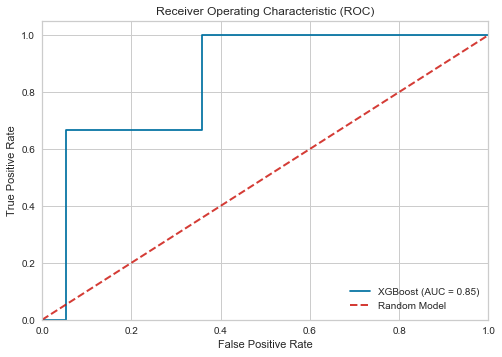

In [55]:
xg_roc_auc = roc_auc_score(Y_test, y_scores_xg)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_scores_xg)
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Random Model', alpha=.8)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [56]:
import matplotlib.pyplot as plot

In [57]:
import shap

In [58]:
explainer = shap.TreeExplainer(xg)

In [59]:
shap_values = explainer.shap_values(X_train)

In [60]:
shap.initjs()

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:464: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


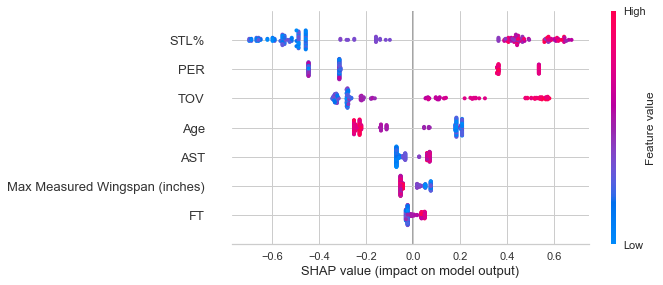

In [61]:
shap.summary_plot(shap_values, X_train)

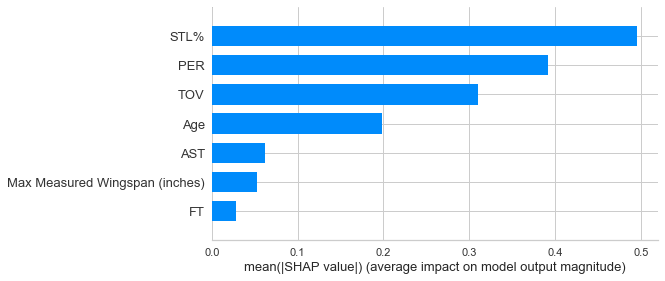

In [62]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [64]:
shap_interaction_values = shap.TreeExplainer(xg).shap_interaction_values(X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/summary.py:181: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


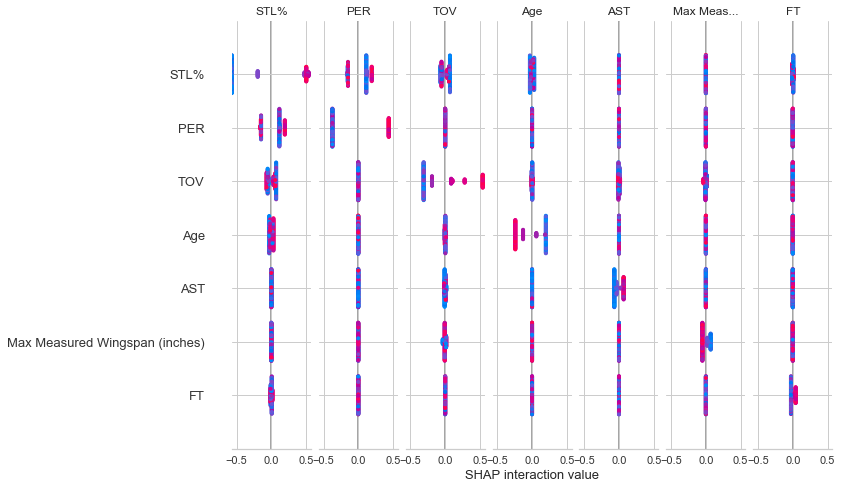

In [65]:
shap.summary_plot(shap_interaction_values, X)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


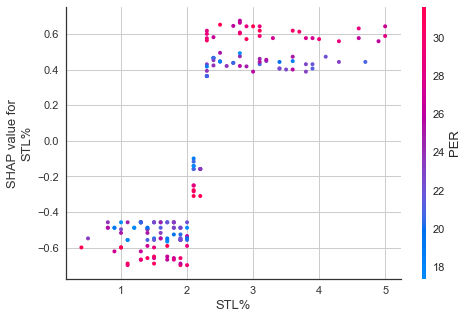

In [66]:
shap.dependence_plot("STL%", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


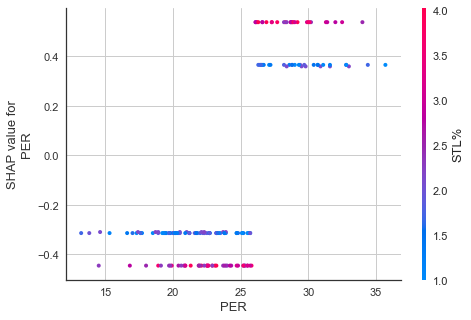

In [67]:
shap.dependence_plot("PER", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


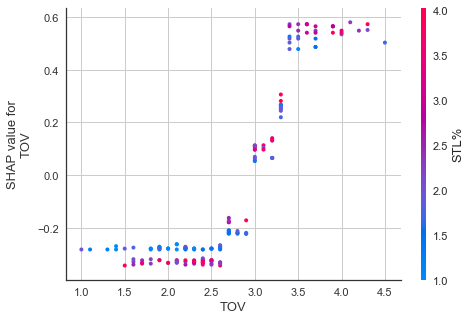

In [68]:
shap.dependence_plot("TOV", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


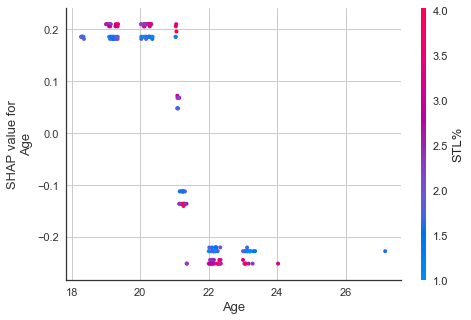

In [69]:
shap.dependence_plot("Age", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


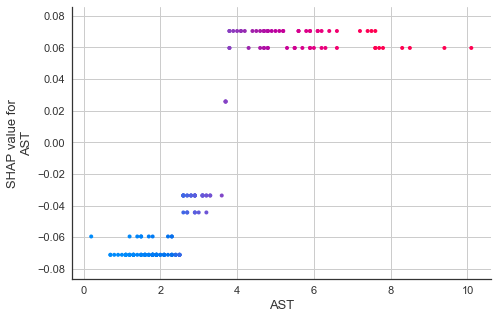

In [70]:
shap.dependence_plot("AST", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


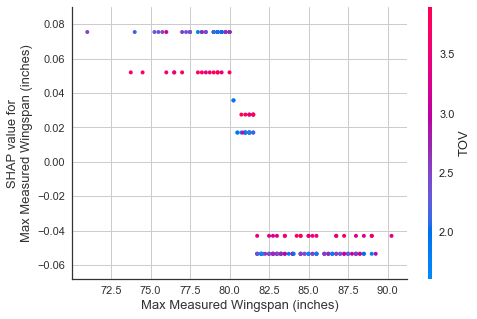

In [71]:
shap.dependence_plot("Max Measured Wingspan (inches)", shap_values, X_train)

/opt/anaconda3/lib/python3.7/site-packages/shap/plots/dependence.py:291: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


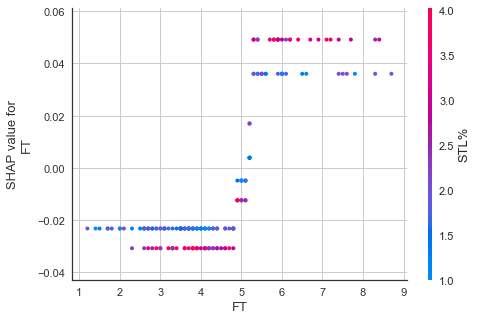

In [72]:
shap.dependence_plot("FT", shap_values, X_train)

In [94]:
dataset = pd.read_excel('2017 Stats Only Star.xlsx')

In [95]:
dataset.head()

,Player,Age,FT,AST,TOV,PER,STL%,Max Measured Wingspan (inches)
0,Markelle Fultz,19.03,4.9,6.6,3.6,27.9,2.4,81.5
1,Lonzo Ball,19.24,2.1,8.7,2.8,24.7,2.8,81.0
2,De'Aaron Fox,19.19,5.9,6.2,3.3,22.6,2.7,79.0
3,Dennis Smith,19.21,5.1,7.1,3.9,23.1,3.1,77.0
4,Derrick White,22.36,5.3,5.3,2.9,27.3,2.2,79.5


In [96]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.3814877  0.08371054 0.14016354 0.15981895 0.06539315 0.03280716
 0.02621978 0.39352334 0.04656411 0.09673081 0.04636859 0.03339479
 0.03339479 0.05719883 0.11623885 0.03525493 0.02855006 0.02117358
 0.02748799 0.02019999 0.03942432 0.04270361 0.02158675 0.08871322
 0.14824909 0.01969513 0.05483866 0.03371613 0.09436244 0.13754982
 0.01885152 0.05603109 0.02747372 0.02885623 0.02402338 0.04852666
 0.04879888 0.02747372 0.02402338 0.1073847  0.02211877 0.02796858
 0.12644343 0.02747372 0.03371613 0.09781321 0.02747372 0.03590442
 0.04650667 0.04402373]


In [97]:
output = {'Player':players, 'All Star': predictions}
output = pd.DataFrame(output, columns = ['Player', 'All Star'])
print(output)

                 Player  All Star
0        Markelle Fultz  0.381488
1            Lonzo Ball  0.083711
2          De'Aaron Fox  0.140164
3          Dennis Smith  0.159819
4         Derrick White  0.065393
5         Frank Jackson  0.032807
6           Frank Mason  0.026220
7           Jawun Evans  0.393523
8          Monte Morris  0.046564
9         Edmond Sumner  0.096731
10  Nigel Williams-Goss  0.046369
11           Malik Monk  0.033395
12         Luke Kennard  0.033395
13     Donovan Mitchell  0.057199
14            Josh Hart  0.116239
15           Davon Reed  0.035255
16        Wesley Iwundu  0.028550
17         Dwayne Bacon  0.021174
18         Tyler Dorsey  0.027488
19       Damyean Dotson  0.020200
20       Sterling Brown  0.039424
21         Kadeem Allen  0.042704
22          Jabari Bird  0.021587
23         Jayson Tatum  0.088713
24         Josh Jackson  0.148249
25       Justin Jackson  0.019695
26           OG Anunoby  0.054839
27         Semi Ojeleye  0.033716
28        Dill

In [98]:
output.to_excel("2017 Star Stats Only Prob.xlsx")

In [99]:
dataset = pd.read_excel('2018 Stats Only Star.xlsx')

In [100]:
dataset.head()

,Player,Age,FT,AST,TOV,PER,STL%,Max Measured Wingspan (inches)
0,DeAndre Ayton,19.338,4.8,1.9,2.4,32.6,1.0,89.0
1,Marvin Bagley,19.104,4.7,1.8,2.7,30.6,1.4,84.5
2,Jaren Jackson Jr.,18.284,5.5,2.0,3.2,26.9,1.6,88.0
3,Mohamed Bamba,20.045,3.6,0.7,2.0,28.3,1.5,93.0
4,Michael Porter,19.362,5.3,0.8,2.3,20.0,3.4,84.0


In [101]:
players = dataset['Player']
dataset = dataset.drop('Player', axis=1)
predictions = xg.predict_proba(dataset)[:,1]
print(predictions)

[0.04650667 0.04650667 0.06334726 0.04650667 0.05979851 0.06409184
 0.4029888  0.06956409 0.11659142 0.02747372 0.10489983 0.03072223
 0.02747372 0.05356019 0.03175389 0.03611313 0.02942046 0.02869191
 0.03627326 0.11063995 0.09807097 0.02801337 0.02747372 0.04740195
 0.05252578 0.03970588 0.16162506 0.07534392 0.07175621 0.03210848
 0.06378455 0.04569519 0.07080945 0.05661904 0.02087566 0.04696427
 0.07158703 0.07311548 0.06562176 0.02747372]


In [102]:
output = {'Player':players, 'All Star': predictions}
output = pd.DataFrame(output, columns = ['Player', 'All Star'])
print(output)

                 Player  All Star
0         DeAndre Ayton  0.046507
1         Marvin Bagley  0.046507
2     Jaren Jackson Jr.  0.063347
3         Mohamed Bamba  0.046507
4        Michael Porter  0.059799
5        Wendell Carter  0.064092
6            Trae Young  0.402989
7         Collin Sexton  0.069564
8         Mikal Bridges  0.116591
9            Kevin Knox  0.027474
10  Shai Gilgeous-Al...  0.104900
11        Miles Bridges  0.030722
12      Robert Williams  0.027474
13         Zhaire Smith  0.053560
14        Landry Shamet  0.031754
15         Khyri Thomas  0.036113
16       Gary Trent Jr.  0.029420
17        Lonnie Walker  0.028692
18        Kevin Huerter  0.036273
19   Chandler Hutchison  0.110640
20           Troy Brown  0.098071
21     Donte DiVincenzo  0.028013
22       Omari Spellman  0.027474
23        Jalen Brunson  0.047402
24        Aaron Holiday  0.052526
25      Jerome Robinson  0.039706
26         Trevon Duval  0.161625
27          Josh Okogie  0.075344
28    De'Antho

In [103]:
output.to_excel("2018 Star Stats Only Prob.xlsx")